## National Football League 

### 2019 - 2020 season

In [6]:
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",1500)

### Parsing dates

In [7]:
def parseDate(df):
    for index,x in enumerate(df["date"]):
        # date is in format MMDD
        # from August to September
        if (int(x) > 800 and int(x) <= 931 and len(str(x)) == 3):
            month = str(x)[:1]
            day = str(x)[1:]
            
            df["date"].iloc[index] = month + "/" + day + "/" + "2019"
            print("changed: %s" % df["date"].iloc[index])
        # October to December
        elif (int(x) > 800 and int(x) <= 1231 and len(str(x)) == 4):
            month = str(x)[:2]
            day = str(x)[2:]
            df["date"].iloc[index] = month + "/" + day + "/" + "2019"
            print("changed: %s" % df["date"].iloc[index])
        elif (int(x) <= 800):
            month = str(x)[:1]
            day = str(x)[1:]
            
            df["date"].iloc[index] = month + "/" + day + "/" + "2020"
            

In [8]:
dfNfl = pd.read_csv("../csv_files/sbro/nfl/nfl_2019_sbro.csv")

### Rename column(s)

In [9]:
dfNfl.rename(columns={"ML": "american odds","Final": "final","Date": "date","Open": "open","Close": "close", \
    "Team": "team"},inplace=True)

In [10]:
dfNfl["date"].sample(50)

510     111
148    1006
275    1110
185    1020
29      909
372    1201
426    1215
120     929
76      922
168    1013
370    1201
70      922
421    1215
167    1013
281    1110
83      922
56      915
466    1222
296    1117
129    1006
3       908
11      908
265    1107
338    1124
31      912
63      919
9       908
99      929
37      915
491    1229
306    1117
137    1006
473    1229
67      922
220    1027
54      915
318    1121
498    1229
28      909
445    1222
305    1117
6       908
271    1110
433    1215
149    1006
399    1208
163    1013
241    1103
449    1222
253    1103
Name: date, dtype: int64

In [11]:
parseDate(dfNfl).sample(50)

C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


changed: 9/05/2019
changed: 9/05/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/09/2019
changed: 9/09/2019
changed: 9/12/2019
changed: 9/12/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/1

AttributeError: 'NoneType' object has no attribute 'sample'

In [ ]:
dfNfl["date"].sample(45)

### Change date to date time index

In [14]:
dfNfl["date"] = pd.to_datetime(dfNfl["date"],format="%m/%d/%Y")
dfNfl.head(50)

,date,Rot,VH,team,1st,2nd,3rd,4th,final,open,close,american odds,2H
0,2019-09-05,451,V,GreenBay,0,7,0,3,10,46.0,46.5,140,23.0
1,2019-09-05,452,H,Chicago,3,0,0,0,3,3.5,3.0,-160,3.0
2,2019-09-08,453,V,Atlanta,0,0,0,12,12,47.5,46.5,160,2.5
3,2019-09-08,454,H,Minnesota,14,7,7,0,28,4.5,3.5,-190,22.5
4,2019-09-08,455,V,Washington,10,10,0,7,27,46.5,44.0,425,23.0
5,2019-09-08,456,H,Philadelphia,0,7,14,11,32,8.0,10.0,-600,8.0
6,2019-09-08,457,V,Buffalo,0,0,3,14,17,38.5,41.0,120,0.5
7,2019-09-08,458,H,NYJets,6,0,10,0,16,3.5,2.5,-140,20.0
8,2019-09-08,459,V,Baltimore,21,21,10,7,59,3.5,7.0,-360,0.5
9,2019-09-08,460,H,Miami,0,10,0,0,10,36.5,40.5,280,18.5


### Copy dataframe

In [15]:
dfCopy = dfNfl.copy(deep=True)

### Summary

In [16]:
dfCopy.describe()

,Rot,1st,2nd,3rd,4th,final,open,close,american odds,2H
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,334.611111,4.597701,6.963602,4.961686,6.153257,22.779693,25.521073,25.463602,-54.296935,12.781609
std,125.441853,4.730657,5.431180,4.793076,5.215829,10.119977,20.434050,20.208358,465.770266,9.847893
min,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5000.000000,0.000000
25%,261.000000,0.000000,3.000000,0.000000,0.000000,16.000000,4.500000,5.000000,-240.000000,3.000000
50%,307.000000,3.000000,7.000000,3.000000,7.000000,23.000000,28.250000,28.750000,-110.000000,12.500000
75%,463.000000,7.000000,10.000000,7.000000,9.000000,30.000000,46.000000,45.500000,190.000000,22.500000
max,490.000000,21.000000,28.000000,28.000000,24.000000,59.000000,54.500000,55.500000,1500.000000,29.000000


In [17]:
dfNfl["american odds"].unique().tolist()

[140,
 -160,
 160,
 -190,
 425,
 -600,
 120,
 -140,
 -360,
 280,
 100,
 -120,
 215,
 -265,
 -125,
 105,
 -150,
 130,
 375,
 -500,
 240,
 -300,
 270,
 -340,
 260,
 -330,
 235,
 -290,
 150,
 -180,
 -110,
 550,
 -800,
 -2500,
 1100,
 180,
 -220,
 -310,
 250,
 290,
 -380,
 185,
 -230,
 210,
 -260,
 350,
 -450,
 1400,
 -4000,
 1500,
 -5000,
 200,
 -250,
 115,
 -135,
 145,
 -170,
 -240,
 190,
 170,
 -200,
 205,
 -255,
 300,
 -400,
 -900,
 600,
 125,
 -145,
 110,
 -130,
 -175,
 155,
 135,
 -155,
 -185,
 -1400,
 800,
 195,
 -245,
 450,
 -650,
 850,
 -1500,
 400,
 -550,
 -115,
 220,
 -270,
 230,
 -280,
 -105,
 525,
 -750,
 500,
 -700,
 -480,
 365,
 -210,
 175,
 -350,
 275,
 165,
 -195,
 255,
 -320,
 -390,
 295,
 142,
 -165,
 -275,
 225,
 325,
 -425,
 330,
 -430,
 -1000,
 650,
 900,
 -1600]

### Update spread and compute point differential

In [18]:
dfCopy["open spread"] = ""   
dfCopy["close spread"] = ""
dfCopy["open total"] = ""
dfCopy["close total"] = ""
dfCopy["point differential"] = ""
    
# read 2 rows at a time    
for index,row in dfNfl.groupby(dfNfl.index // 2):
    print("index: %s" % index)
    # print(row)

    if (row["american odds"].iloc[0] < 0):
        print(row)
        dfCopy["open spread"].iloc[row.index[0]] = row["open"].iloc[0] * -1
        dfCopy["close spread"].iloc[row.index[0]] = row["close"].iloc[0] * -1
        dfCopy["open total"].iloc[row.index[0]] = row["open"].iloc[1]
        dfCopy["close total"].iloc[row.index[0]] = row["close"].iloc[1]
        
        dfCopy["open spread"].iloc[row.index[1]] = row["open"].iloc[0]
        dfCopy["close spread"].iloc[row.index[1]] = row["close"].iloc[0]
        dfCopy["open total"].iloc[row.index[1]] = row["open"].iloc[1]
        dfCopy["close total"].iloc[row.index[1]] = row["close"].iloc[1]
        
    # money line is positive
    elif (row["american odds"].iloc[0] > 0):
        dfCopy["open total"].iloc[row.index[0]] = row["open"].iloc[0]
        dfCopy["close total"].iloc[row.index[0]] = row["close"].iloc[0]
        dfCopy["open spread"].iloc[row.index[0]] = row["open"].iloc[1]
        dfCopy["close spread"].iloc[row.index[0]] = row["close"].iloc[1]
        
        dfCopy["open total"].iloc[row.index[1]] = row["open"].iloc[0]
        dfCopy["close total"].iloc[row.index[1]] = row["close"].iloc[0]
        dfCopy["open spread"].iloc[row.index[1]] = row["open"].iloc[1] * -1
        dfCopy["close spread"].iloc[row.index[1]] = row["close"].iloc[1] * -1
        
    # if the team won or loss the game; negative for loss
    dfCopy["point differential"].iloc[row.index[0]] = row["final"].iloc[0].astype(float) \
        - row["final"].iloc[1].astype(float)
    
    dfCopy["point differential"].iloc[row.index[1]] = row["final"].iloc[1].astype(float) \
        - row["final"].iloc[0].astype(float)
    

index: 0
index: 1
index: 2
index: 3
index: 4
        date  Rot VH       team  1st  2nd  3rd  4th  final  open  close  \
8 2019-09-08  459  V  Baltimore   21   21   10    7     59   3.5    7.0   
9 2019-09-08  460  H      Miami    0   10    0    0     10  36.5   40.5   

   american odds    2H  
8           -360   0.5  
9            280  18.5  
index: 5
index: 6
         date  Rot VH          team  1st  2nd  3rd  4th  final  open  close  \
12 2019-09-08  463  V    KansasCity   17    6    7   10     40   5.0    3.5   
13 2019-09-08  464  H  Jacksonville    7    6    0   13     26  52.5   49.0   

    american odds    2H  
12           -190   3.0  
13            160  24.0  
index: 7
index: 8
         date  Rot VH      team  1st  2nd  3rd  4th  final  open  close  \
16 2019-09-08  467  V    LARams    0   13   10    7     30   3.0    1.5   
17 2019-09-08  468  H  Carolina    0    3   10   14     27  50.5   49.0   

    american odds    2H  
16           -125  24.0  
17            105   1.5 

C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

index: 31
         date  Rot VH          team  1st  2nd  3rd  4th  final  open  close  \
62 2019-09-19  301  V     Tennessee    0    0    0    7      7   2.5    1.5   
63 2019-09-19  302  H  Jacksonville   14    0    3    3     20  41.0   38.0   

    american odds    2H  
62           -125   3.5  
63            105  17.0  
index: 32
index: 33
index: 34
index: 35
index: 36
index: 37
index: 38
index: 39
index: 40
index: 41
index: 42
index: 43
index: 44
index: 45
         date  Rot VH       team  1st  2nd  3rd  4th  final  open  close  \
90 2019-09-22  487  V     LARams    3    0    7   10     20   2.5    4.5   
91 2019-09-22  488  H  Cleveland    0    6    7    0     13  51.0   48.0   

    american odds    2H  
90           -220   5.5  
91            180  24.0  
index: 46
         date  Rot VH        team  1st  2nd  3rd  4th  final  open  close  \
92 2019-09-23  489  V     Chicago    7   21    0    3     31   4.0    4.5   
93 2019-09-23  490  H  Washington    0    3    6    6     15  4

C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

index: 65
index: 66
index: 67
          date  Rot VH       team  1st  2nd  3rd  4th  final  open  close  \
134 2019-10-06  459  V  Minnesota    3   15    7    3     28   6.0    6.0   
135 2019-10-06  460  H   NYGiants    0    7    3    0     10  46.0   43.5   

     american odds    2H  
134           -250   2.0  
135            210  21.5  
index: 68
          date  Rot VH        team  1st  2nd  3rd  4th  final  open  close  \
136 2019-10-06  461  V  NewEngland    6    6   14    7     33  13.0   16.5   
137 2019-10-06  462  H  Washington    7    0    0    0      7  47.5   42.0   

     american odds    2H  
136          -1400   7.0  
137            800  20.0  
index: 69
index: 70
index: 71
index: 72
index: 73
index: 74
index: 75
index: 76
index: 77
index: 78
index: 79
index: 80
index: 81
index: 82
index: 83
          date  Rot VH        team  1st  2nd  3rd  4th  final  open  close  \
166 2019-10-13  263  V  Washington    0    7   10    0     17   5.0    6.0   
167 2019-10-13  264  H   

C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

index: 101
index: 102
          date  Rot VH        team  1st  2nd  3rd  4th  final  open  close  \
204 2019-10-21  475  V  NewEngland   17    7    2    7     33  10.0    9.5   
205 2019-10-21  476  H      NYJets    0    0    0    0      0  43.0   43.0   

     american odds    2H  
204           -450   1.0  
205            350  20.0  
index: 103
index: 104
index: 105
index: 106
index: 107
          date  Rot VH     team  1st  2nd  3rd  4th  final  open  close  \
214 2019-10-27  257  V  Seattle    3   21    0    3     27   3.0    7.5   
215 2019-10-27  258  H  Atlanta    0    0   11    9     20  54.0   49.0   

     american odds    2H  
214           -400   1.5  
215            300  22.0  
index: 108
index: 109
          date  Rot VH          team  1st  2nd  3rd  4th  final  open  close  \
218 2019-10-27  261  V  Philadelphia    3    8   13    7     31  41.5   38.5   
219 2019-10-27  262  H       Buffalo    0    7    6    0     13   2.5    1.0   

     american odds    2H  
218       

C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

index: 137
index: 138
          date  Rot VH        team  1st  2nd  3rd  4th  final  open  close  \
276 2019-11-10  261  V   Baltimore   14   14   21    0     49  10.0   10.5   
277 2019-11-10  262  H  Cincinnati    0   10    0    3     13  46.0   44.5   

     american odds    2H  
276           -600   3.5  
277            425  22.5  
index: 139
index: 140
index: 141
index: 142
          date  Rot VH        team  1st  2nd  3rd  4th  final  open  close  \
284 2019-11-10  269  V      LARams    7    0    3    2     12   3.0    4.5   
285 2019-11-10  270  H  Pittsburgh    7    7    0    3     17  45.5   43.5   

     american odds    2H  
284           -220   3.5  
285            180  21.0  
index: 143
index: 144
index: 145
index: 146
          date  Rot VH     team  1st  2nd  3rd  4th  final  open  close  \
292 2019-11-17  451  V   Dallas    3   21    3    8     35   3.5    7.0   
293 2019-11-17  452  H  Detroit    7    7    7    6     27  51.5   46.5   

     american odds    2H  
292  

C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

index: 172
          date  Rot VH     team  1st  2nd  3rd  4th  final  open  close  \
344 2019-11-28  305  V  Chicago    7    3    7    7     24   1.0    5.5   
345 2019-11-28  306  H  Detroit   14    3    0    3     20  41.0   37.0   

     american odds    2H  
344           -270   4.0  
345            220  20.0  
index: 173
index: 174
          date  Rot VH        team  1st  2nd  3rd  4th  final  open  close  \
348 2019-11-28  309  V  NewOrleans    7   10    3    6     26   5.0    7.0   
349 2019-11-28  310  H     Atlanta    0    9    0    9     18  48.0   47.5   

     american odds    2H  
348           -390   3.0  
349            295  23.5  
index: 175
          date  Rot VH      team  1st  2nd  3rd  4th  final  open  close  \
350 2019-12-01  451  V  GreenBay   14    3    0   14     31   7.5    6.5   
351 2019-12-01  452  H  NYGiants    7    3    3    0     13  47.0   43.5   

     american odds    2H  
350           -330   3.0  
351            260  21.0  
index: 176
index: 177
i

C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g


          date  Rot VH          team  1st  2nd  3rd  4th  final  open  close  \
410 2019-12-15  307  V  Philadelphia    3    7    7   20     37   6.0    6.5   
411 2019-12-15  308  H    Washington    7    7    0   13     27  40.0   39.0   

     american odds    2H  
410           -310   6.0  
411            250  20.5  
index: 206
index: 207
          date  Rot VH        team  1st  2nd  3rd  4th  final  open  close  \
414 2019-12-15  311  V  NewEngland    7    6   14    7     34  11.0   10.5   
415 2019-12-15  312  H  Cincinnati   10    0    0    3     13  40.0   42.0   

     american odds    2H  
414           -650   3.5  
415            450  20.5  
index: 208
index: 209
          date  Rot VH      team  1st  2nd  3rd  4th  final  open  close  \
418 2019-12-15  315  V   Seattle   13    7    3    7     30   5.0    6.0   
419 2019-12-15  316  H  Carolina    0    7    3   14     24  48.5   49.0   

     american odds    2H  
418           -280   0.5  
419            230  23.5  
index: 

C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g


index: 235
          date  Rot VH        team  1st  2nd  3rd  4th  final  open  close  \
470 2019-12-29  103  V   Cleveland    7    9    0    7     23   3.0    2.5   
471 2019-12-29  104  H  Cincinnati   13    7    3   10     33  46.0   44.0   

     american odds    2H  
470           -145   2.5  
471            125  22.0  
index: 236
          date  Rot VH       team  1st  2nd  3rd  4th  final  open  close  \
472 2019-12-29  105  V    Chicago    6    5    7    3     21   7.0    5.0   
473 2019-12-29  106  H  Minnesota    0    6    0   13     19  41.5   35.5   

     american odds    2H  
472           -250   2.5  
473            200  17.0  
index: 237
          date  Rot VH          team  1st  2nd  3rd  4th  final  open  close  \
474 2019-12-29  107  V  Indianapolis   10   10    0    0     20   1.0    5.5   
475 2019-12-29  108  H  Jacksonville    3   13    8   14     38  44.5   41.5   

     american odds    2H  
474           -250   0.5  
475            200  22.0  
index: 238
inde

C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [19]:
dfCopy.head(50)

,date,Rot,VH,team,1st,2nd,3rd,4th,final,open,close,american odds,2H,open spread,close spread,open total,close total,point differential
0,2019-09-05,451,V,GreenBay,0,7,0,3,10,46.0,46.5,140,23.0,3.5,3.0,46.0,46.5,7.0
1,2019-09-05,452,H,Chicago,3,0,0,0,3,3.5,3.0,-160,3.0,-3.5,-3.0,46.0,46.5,-7.0
2,2019-09-08,453,V,Atlanta,0,0,0,12,12,47.5,46.5,160,2.5,4.5,3.5,47.5,46.5,-16.0
3,2019-09-08,454,H,Minnesota,14,7,7,0,28,4.5,3.5,-190,22.5,-4.5,-3.5,47.5,46.5,16.0
4,2019-09-08,455,V,Washington,10,10,0,7,27,46.5,44.0,425,23.0,8.0,10.0,46.5,44.0,-5.0
5,2019-09-08,456,H,Philadelphia,0,7,14,11,32,8.0,10.0,-600,8.0,-8.0,-10.0,46.5,44.0,5.0
6,2019-09-08,457,V,Buffalo,0,0,3,14,17,38.5,41.0,120,0.5,3.5,2.5,38.5,41.0,1.0
7,2019-09-08,458,H,NYJets,6,0,10,0,16,3.5,2.5,-140,20.0,-3.5,-2.5,38.5,41.0,-1.0
8,2019-09-08,459,V,Baltimore,21,21,10,7,59,3.5,7.0,-360,0.5,-3.5,-7.0,36.5,40.5,49.0
9,2019-09-08,460,H,Miami,0,10,0,0,10,36.5,40.5,280,18.5,3.5,7.0,36.5,40.5,-49.0


### Probability odds

In [20]:
dfCopy["probability odds"] = ""

for index,row in dfCopy.iterrows():
    print(index)
    # check for null values
    if (not np.isnan(dfCopy["american odds"].iloc[index])):
        if (re.search(r"-",dfCopy["american odds"].iloc[index].astype(str))):
            print(dfCopy["american odds"].iloc[index])
            result = (-1.0 * (dfCopy["american odds"].iloc[index].astype(float)) / 
                ((-1.0 * dfCopy["american odds"].iloc[index].astype(float)) + 100.0))
            
            dfCopy["probability odds"].iloc[index] = round(result * 100,2)
                      
        else:
            result = 100.0 / (dfCopy["american odds"].iloc[index].astype(float) + 100.0)
            dfCopy["probability odds"].iloc[index] = round(result * 100,2)
    else:
        dfCopy["probability odds"].iloc[index] = None

0
1
-160
2
3
-190
4
5
-600
6
7
-140
8
-360
9
10
11
-120
12
-190
13
14
15
-265
16
-125
17
18
-150
19
20
21
-500
22
23
-300
24
25
-340
26
27
-265
28
29
-330
30
31
-290
32
33
-180
34
-110
35
-110
36
-120
37
38
39
-800
40
-2500
41
42
-265
43
44
45
-360
46
47
-220
48
-110
49
-110
50
51
-160
52
-310
53
54
55
-125
56
-150
57
58
-120
59
60
-330
61
62
-125
63
64
65
-380
66
67
-220
68
69
-230
70
71
-260
72
73
-125
74
75
-450
76
77
-4000
78
79
-5000
80
81
-250
82
83
-135
84
85
-250
86
87
-170
88
89
-300
90
-220
91
92
-240
93
94
95
-200
96
97
-255
98
99
-400
100
101
-170
102
-900
103
104
105
-260
106
-400
107
108
-360
109
110
111
-180
112
113
-500
114
-260
115
116
-110
117
-110
118
119
-145
120
-150
121
122
123
-180
124
125
-130
126
-175
127
128
-330
129
130
131
-155
132
133
-185
134
-250
135
136
-1400
137
138
139
-900
140
141
-155
142
143
-220
144
145
-190
146
147
-245
148
149
-185
150
151
-650
152
153
-240
154
155
-1500
156
157
-550
158
159
-120
160
161
-190
162
163
-150
164
165
-185
166
-260
16

C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)



200
201
-220
202
203
-160
204
-450
205
206
207
-1400
208
209
-280
210
211
-125
212
213
-190
214
-400
215
216
217
-330
218
-105
219
-115
220
221
-750
222
223
-700
224
225
-250
226
227
-220
228
229
-265
230
231
-450
232
-240
233
234
235
-800
236
-480
237
238
239
-120
240
241
-650
242
243
-190
244
245
-250
246
-255
247
248
-190
249
250
251
-125
252
253
-150
254
255
-220
256
-210
257
258
-220
259
260
-160
261
262
-330
263
264
-125
265
266
-250
267
268
269
-170
270
271
-250
272
-155
273
274
275
-900
276
-600
277
278
279
-230
280
281
-300
282
283
-650
284
-220
285
286
287
-185
288
289
-265
290
291
-160
292
-400
293
294
-240
295
296
297
-200
298
299
-140
300
301
-500
302
303
-130
304
-350
305
306
307
-240
308
309
-500
310
-220
311
312
313
-750
314
315
-250
316
-280
317
318
319
-195
320
321
-600
322
323
-200
324
-250
325
326
327
-280
328
-200
329
330
331
-550
332
333
-180
334
-200
335
336
337
-220
338
339
-270
340
341
-170
342
-180
343
344
-270
345
346
347
-320
348
-390
349
350
-330
351
352
3

In [21]:
dfCopy.head(55)

,date,Rot,VH,team,1st,2nd,3rd,4th,final,open,close,american odds,2H,open spread,close spread,open total,close total,point differential,probability odds
0,2019-09-05,451,V,GreenBay,0,7,0,3,10,46.0,46.5,140,23.0,3.5,3.0,46.0,46.5,7.0,41.67
1,2019-09-05,452,H,Chicago,3,0,0,0,3,3.5,3.0,-160,3.0,-3.5,-3.0,46.0,46.5,-7.0,61.54
2,2019-09-08,453,V,Atlanta,0,0,0,12,12,47.5,46.5,160,2.5,4.5,3.5,47.5,46.5,-16.0,38.46
3,2019-09-08,454,H,Minnesota,14,7,7,0,28,4.5,3.5,-190,22.5,-4.5,-3.5,47.5,46.5,16.0,65.52
4,2019-09-08,455,V,Washington,10,10,0,7,27,46.5,44.0,425,23.0,8.0,10.0,46.5,44.0,-5.0,19.05
5,2019-09-08,456,H,Philadelphia,0,7,14,11,32,8.0,10.0,-600,8.0,-8.0,-10.0,46.5,44.0,5.0,85.71
6,2019-09-08,457,V,Buffalo,0,0,3,14,17,38.5,41.0,120,0.5,3.5,2.5,38.5,41.0,1.0,45.45
7,2019-09-08,458,H,NYJets,6,0,10,0,16,3.5,2.5,-140,20.0,-3.5,-2.5,38.5,41.0,-1.0,58.33
8,2019-09-08,459,V,Baltimore,21,21,10,7,59,3.5,7.0,-360,0.5,-3.5,-7.0,36.5,40.5,49.0,78.26
9,2019-09-08,460,H,Miami,0,10,0,0,10,36.5,40.5,280,18.5,3.5,7.0,36.5,40.5,-49.0,26.32


### Decimal odds

In [22]:
dfCopy["decimal odds"] = ""

for index,row in dfCopy.iterrows():
    print(index)
    # check for null values
    if (not np.isnan(dfCopy["american odds"].iloc[index])):
        # check for minus 
        if (re.search(r"-",dfCopy["american odds"].iloc[index].astype(str))):
            dfCopy["decimal odds"].iloc[index] = round((100.0 / abs(dfCopy["american odds"].iloc[index]).astype(float)) + 1,2)
        else:
            dfCopy["decimal odds"].iloc[index] = round(((dfCopy["american odds"].iloc[index]).astype(float) / 100.0) + 1,2)
    else:
        dfCopy["decimal odds"].iloc[index] = None


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255

C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)



256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505

In [23]:
dfCopy.head(25)

,date,Rot,VH,team,1st,2nd,3rd,4th,final,open,close,american odds,2H,open spread,close spread,open total,close total,point differential,probability odds,decimal odds
0,2019-09-05,451,V,GreenBay,0,7,0,3,10,46.0,46.5,140,23.0,3.5,3.0,46.0,46.5,7.0,41.67,2.4
1,2019-09-05,452,H,Chicago,3,0,0,0,3,3.5,3.0,-160,3.0,-3.5,-3.0,46.0,46.5,-7.0,61.54,1.62
2,2019-09-08,453,V,Atlanta,0,0,0,12,12,47.5,46.5,160,2.5,4.5,3.5,47.5,46.5,-16.0,38.46,2.6
3,2019-09-08,454,H,Minnesota,14,7,7,0,28,4.5,3.5,-190,22.5,-4.5,-3.5,47.5,46.5,16.0,65.52,1.53
4,2019-09-08,455,V,Washington,10,10,0,7,27,46.5,44.0,425,23.0,8.0,10.0,46.5,44.0,-5.0,19.05,5.25
5,2019-09-08,456,H,Philadelphia,0,7,14,11,32,8.0,10.0,-600,8.0,-8.0,-10.0,46.5,44.0,5.0,85.71,1.17
6,2019-09-08,457,V,Buffalo,0,0,3,14,17,38.5,41.0,120,0.5,3.5,2.5,38.5,41.0,1.0,45.45,2.2
7,2019-09-08,458,H,NYJets,6,0,10,0,16,3.5,2.5,-140,20.0,-3.5,-2.5,38.5,41.0,-1.0,58.33,1.71
8,2019-09-08,459,V,Baltimore,21,21,10,7,59,3.5,7.0,-360,0.5,-3.5,-7.0,36.5,40.5,49.0,78.26,1.28
9,2019-09-08,460,H,Miami,0,10,0,0,10,36.5,40.5,280,18.5,3.5,7.0,36.5,40.5,-49.0,26.32,3.8


### Grouping

In [24]:
dfNfl[["team","close"]].groupby(["team","close"]).count()

Empty DataFrame
Columns: []
Index: [(Arizona, 2.0), (Arizona, 43.5), (Arizona, 44.0), (Arizona, 46.0), (Arizona, 46.5), (Arizona, 47.5), (Arizona, 48.5), (Arizona, 49.0), (Arizona, 50.0), (Arizona, 51.0), (Arizona, 51.5), (Arizona, 52.5), (Atlanta, 3.0), (Atlanta, 3.5), (Atlanta, 7.0), (Atlanta, 46.5), (Atlanta, 47.5), (Atlanta, 48.0), (Atlanta, 48.5), (Atlanta, 49.0), (Atlanta, 49.5), (Atlanta, 51.5), (Atlanta, 53.0), (Atlanta, 54.5), (Baltimore, 3.0), (Baltimore, 3.5), (Baltimore, 4.5), (Baltimore, 5.5), (Baltimore, 6.0), (Baltimore, 7.0), (Baltimore, 10.0), (Baltimore, 10.5), (Baltimore, 13.0), (Baltimore, 17.0), (Baltimore, 35.0), (Baltimore, 44.0), (Baltimore, 48.0), (Baltimore, 52.0), (Buffalo, 1.0), (Buffalo, 3.5), (Buffalo, 6.0), (Buffalo, 7.0), (Buffalo, 10.5), (Buffalo, 17.0), (Buffalo, 37.0), (Buffalo, 38.5), (Buffalo, 39.0), (Buffalo, 41.0), (Buffalo, 41.5), (Buffalo, 42.0), (Buffalo, 43.0), (Buffalo, 44.5), (Buffalo, 47.0), (Carolina, 3.0), (Carolina, 3.5), (Carolina, 6.5), (Carolina, 10.5), (Carolina, 40.5), (Carolina, 45.0), (Carolina, 45.5), (Carolina, 46.5), (Carolina, 47.5), (Carolina, 48.0), (Carolina, 49.0), (Chicago, 3.0), (Chicago, 3.5), (Chicago, 4.0), (Chicago, 4.5), (Chicago, 5.0), (Chicago, 5.5), (Chicago, 6.0), (Chicago, 6.5), (Chicago, 7.0), (Chicago, 38.5), (Chicago, 40.0), (Chicago, 40.5), (Chicago, 41.0), (Chicago, 43.0), (Chicago, 45.5), (Cincinnati, 1.5), (Cincinnati, 3.0), (Cincinnati, 37.0), (Cincinnati, 42.0), (Cincinnati, 43.0), (Cincinnati, 43.5), (Cincinnati, 44.0), (Cincinnati, 44.5), (Cincinnati, 46.5), (Cincinnati, 47.0), (Cincinnati, 48.0), (Cincinnati, 48.5), (Cleveland, 1.0), (Cleveland, 2.5), (Cleveland, 3.0), (Cleveland, 4.0), (Cleveland, 5.5), (Cleveland, 6.5), (Cleveland, 10.5), (Cleveland, 42.5), (Cleveland, 47.5), ...]

In [25]:
dfNfl[["team","close"]].groupby("team").groups

{'Arizona': [19, 38, 83, 115, 130, 171, 182, 222, 237, 270, 308, 367, 399, 429, 464, 494], 'Atlanta': [2, 59, 72, 111, 142, 170, 193, 215, 274, 296, 333, 349, 387, 430, 449, 476], 'Baltimore': [8, 39, 68, 99, 126, 157, 198, 261, 276, 307, 342, 355, 378, 407, 460, 485, 511], 'Buffalo': [6, 36, 71, 109, 144, 187, 219, 241, 268, 304, 323, 346, 379, 424, 440, 487, 500], 'Carolina': [17, 31, 82, 96, 133, 226, 243, 278, 297, 330, 353, 386, 419, 458, 481], 'Chicago': [1, 56, 92, 117, 128, 201, 213, 244, 281, 314, 327, 344, 377, 412, 467, 472], 'Cincinnati': [20, 49, 70, 122, 131, 156, 191, 220, 277, 312, 325, 365, 384, 415, 456, 471], 'Cleveland': [15, 60, 91, 98, 152, 159, 230, 256, 269, 291, 321, 370, 385, 428, 461, 470], 'Dallas': [25, 42, 79, 120, 149, 172, 203, 262, 287, 292, 338, 347, 376, 433, 462, 479], 'Denver': [57, 64, 119, 146, 175, 181, 228, 257, 300, 322, 369, 420, 445, 499], 'Detroit': [18, 35, 66, 107, 178, 209, 252, 280, 293, 334, 345, 388, 409, 444, 491], 'GreenBay': [0, 51,

In [26]:
dfBaltimore = dfCopy[dfCopy["team"] == "Baltimore"]
print("baltimore first quarter: %s" % dfBaltimore["1st"].mean())
print("baltimore second quarter: %s" % dfBaltimore["2nd"].mean())
print("baltimore third quarter: %s" % dfBaltimore["3rd"].mean())
print("baltimore fourth quarter: %s" % dfBaltimore["4th"].mean())
print("baltimore final mean: %s" % dfBaltimore["final"].mean())

baltimore first quarter: 7.529411764705882
baltimore second quarter: 9.529411764705882
baltimore third quarter: 6.235294117647059
baltimore fourth quarter: 8.470588235294118
baltimore final mean: 31.941176470588236


In [27]:
dfNfl["close"].unique().tolist()

[46.5,
 3.0,
 3.5,
 44.0,
 10.0,
 41.0,
 2.5,
 7.0,
 40.5,
 51.0,
 1.0,
 49.0,
 5.5,
 1.5,
 46.0,
 44.5,
 9.0,
 6.0,
 52.0,
 6.5,
 48.0,
 43.5,
 0.0,
 13.0,
 18.5,
 48.5,
 43.0,
 47.0,
 4.0,
 53.0,
 52.5,
 45.0,
 38.0,
 4.5,
 21.0,
 22.5,
 45.5,
 2.0,
 5.0,
 49.5,
 47.5,
 14.5,
 7.5,
 54.5,
 41.5,
 38.5,
 37.0,
 40.0,
 16.5,
 42.0,
 14.0,
 55.5,
 10.5,
 17.0,
 42.5,
 50.0,
 9.5,
 11.5,
 12.0,
 39.5,
 51.5,
 39.0,
 50.5,
 13.5,
 11.0,
 37.5,
 8.0,
 36.5,
 35.5,
 35.0]

In [28]:
# dfFilterACR = df[(df["AverageCorrosionRate"] < 1.0) & (df["AverageCorrosionRate"] > -0.2)]
dfGreenBay = dfCopy[dfCopy["team"] == "GreenBay"]
dfGreenBay

,date,Rot,VH,team,1st,2nd,3rd,4th,final,open,close,american odds,2H,open spread,close spread,open total,close total,point differential,probability odds,decimal odds
0,2019-09-05,451,V,GreenBay,0,7,0,3,10,46.0,46.5,140,23.0,3.5,3.0,46.0,46.5,7.0,41.67,2.4
51,2019-09-15,280,H,GreenBay,14,7,0,0,21,3.0,3.0,-160,23.0,-3.0,-3.0,46.0,43.5,5.0,61.54,1.62
65,2019-09-22,462,H,GreenBay,7,10,7,3,27,7.0,7.0,-380,2.5,-7.0,-7.0,43.5,41.0,11.0,79.17,1.26
95,2019-09-26,102,H,GreenBay,7,13,7,0,27,3.0,3.5,-200,3.5,-3.0,-3.5,48.0,46.5,-7.0,66.67,1.5
148,2019-10-06,473,V,GreenBay,14,3,14,3,34,48.0,46.5,155,24.0,4.0,3.0,48.0,46.5,10.0,39.22,2.55
179,2019-10-14,276,H,GreenBay,0,10,3,10,23,6.5,3.5,-200,4.5,-6.5,-3.5,46.5,46.5,1.0,66.67,1.5
189,2019-10-20,460,H,GreenBay,7,14,14,7,42,7.5,6.0,-270,0.5,-7.5,-6.0,46.0,47.5,18.0,72.97,1.37
232,2019-10-27,275,V,GreenBay,14,0,3,14,31,3.5,5.0,-240,3.5,-3.5,-5.0,48.0,48.0,7.0,70.59,1.42
258,2019-11-03,471,V,GreenBay,0,0,3,8,11,3.5,4.5,-220,6.0,-3.5,-4.5,46.0,50.5,-15.0,68.75,1.45
279,2019-11-10,264,H,GreenBay,7,7,10,0,24,6.0,5.0,-230,2.5,-6.0,-5.0,48.0,49.0,8.0,69.7,1.43


In [29]:
dfGreenBay.set_index(["date"])

,Rot,VH,team,1st,2nd,3rd,4th,final,open,close,american odds,2H,open spread,close spread,open total,close total,point differential,probability odds,decimal odds
date,,,,,,,,,,,,,,,,,,,
2019-09-05,451,V,GreenBay,0,7,0,3,10,46.0,46.5,140,23.0,3.5,3.0,46.0,46.5,7.0,41.67,2.4
2019-09-15,280,H,GreenBay,14,7,0,0,21,3.0,3.0,-160,23.0,-3.0,-3.0,46.0,43.5,5.0,61.54,1.62
2019-09-22,462,H,GreenBay,7,10,7,3,27,7.0,7.0,-380,2.5,-7.0,-7.0,43.5,41.0,11.0,79.17,1.26
2019-09-26,102,H,GreenBay,7,13,7,0,27,3.0,3.5,-200,3.5,-3.0,-3.5,48.0,46.5,-7.0,66.67,1.5
2019-10-06,473,V,GreenBay,14,3,14,3,34,48.0,46.5,155,24.0,4.0,3.0,48.0,46.5,10.0,39.22,2.55
2019-10-14,276,H,GreenBay,0,10,3,10,23,6.5,3.5,-200,4.5,-6.5,-3.5,46.5,46.5,1.0,66.67,1.5
2019-10-20,460,H,GreenBay,7,14,14,7,42,7.5,6.0,-270,0.5,-7.5,-6.0,46.0,47.5,18.0,72.97,1.37
2019-10-27,275,V,GreenBay,14,0,3,14,31,3.5,5.0,-240,3.5,-3.5,-5.0,48.0,48.0,7.0,70.59,1.42
2019-11-03,471,V,GreenBay,0,0,3,8,11,3.5,4.5,-220,6.0,-3.5,-4.5,46.0,50.5,-15.0,68.75,1.45


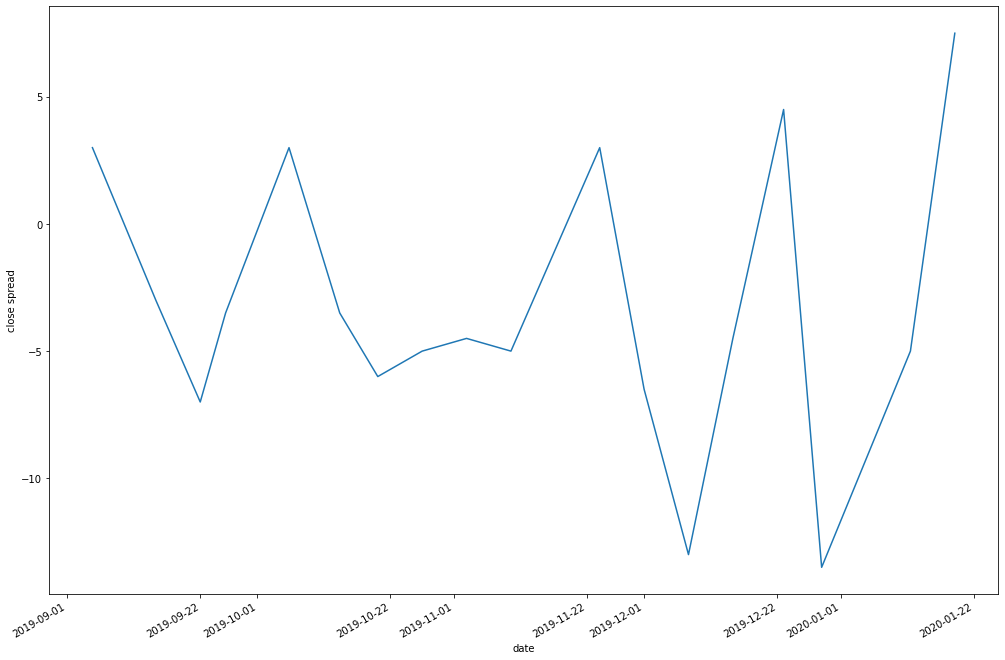

In [30]:
fig,ax = plt.subplots(figsize=(17,12))
ax.plot(dfGreenBay["date"],dfGreenBay["close spread"])
ax.set_ylabel("close spread")
ax.set_xlabel("date")
fig.autofmt_xdate()
plt.show()

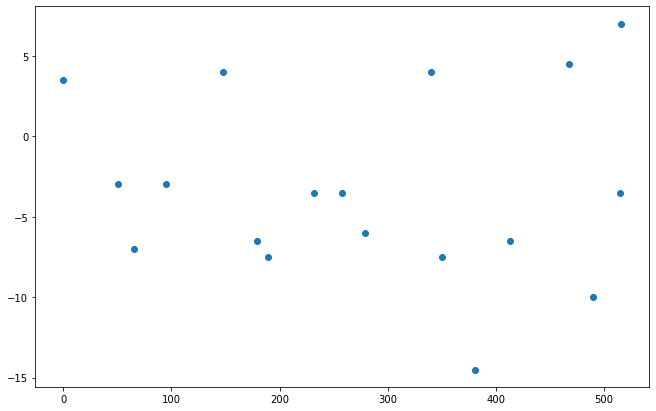

In [31]:
plt.figure(figsize=(11,7))
plt.scatter(x=dfGreenBay.index,y=dfGreenBay["open spread"])

### Total distribution

<AxesSubplot:>

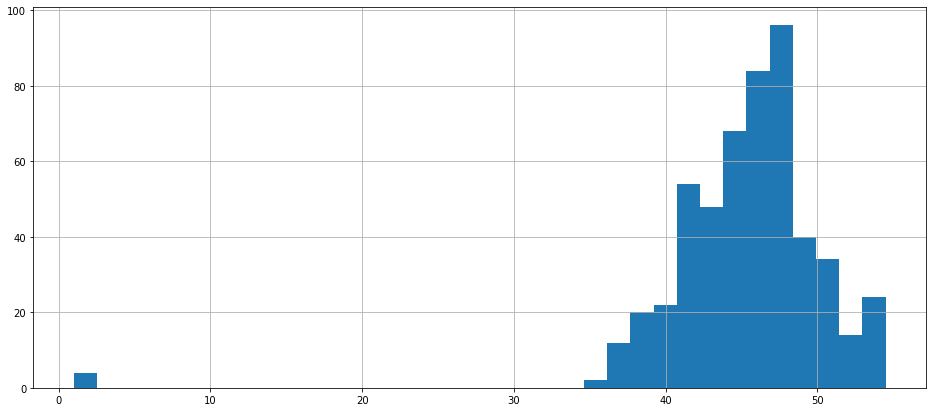

In [32]:
dfCopy["open total"].hist(bins=35,figsize=(16,7))

<AxesSubplot:>

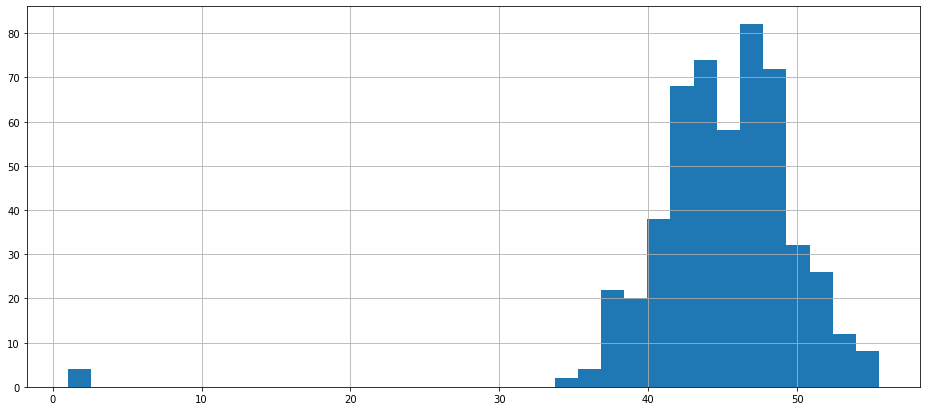

In [33]:
dfCopy["close total"].hist(bins=35,figsize=(16,7))

### New England point differential distribution

In [34]:
dfNewEngland = dfCopy[dfCopy["team"] == "NewEngland"]
dfNewEngland

,date,Rot,VH,team,1st,2nd,3rd,4th,final,open,close,american odds,2H,open spread,close spread,open total,close total,point differential,probability odds,decimal odds
27,2019-09-08,478,H,NewEngland,7,13,10,3,33,6.0,5.5,-265,24.0,-6.0,-5.5,51.5,49.0,30.0,72.6,1.38
40,2019-09-15,269,V,NewEngland,7,6,10,20,43,15.0,18.5,-2500,7.5,-15.0,-18.5,47.0,48.5,43.0,96.15,1.04
77,2019-09-22,474,H,NewEngland,13,7,10,0,30,21.5,21.0,-4000,7.5,-21.5,-21.0,45.5,43.0,16.0,97.56,1.02
108,2019-09-29,263,V,NewEngland,13,0,3,0,16,6.5,7.0,-360,2.5,-6.5,-7.0,44.0,41.5,6.0,78.26,1.28
136,2019-10-06,461,V,NewEngland,6,6,14,7,33,13.0,16.5,-1400,7.0,-13.0,-16.5,47.5,42.0,26.0,93.33,1.07
155,2019-10-10,104,H,NewEngland,7,14,0,14,35,15.0,17.0,-1500,7.0,-15.0,-17.0,46.5,43.0,21.0,93.75,1.07
204,2019-10-21,475,V,NewEngland,17,7,2,7,33,10.0,9.5,-450,1.0,-10.0,-9.5,43.0,43.0,33.0,81.82,1.22
231,2019-10-27,274,H,NewEngland,17,0,7,3,27,11.0,10.0,-450,2.5,-11.0,-10.0,46.5,42.5,14.0,81.82,1.22
260,2019-11-03,473,V,NewEngland,0,13,7,0,20,4.5,3.0,-160,4.5,-4.5,-3.0,46.5,44.0,-17.0,61.54,1.62
310,2019-11-17,469,V,NewEngland,0,9,8,0,17,3.0,4.5,-220,3.5,-3.0,-4.5,46.0,45.0,7.0,68.75,1.45


<AxesSubplot:>

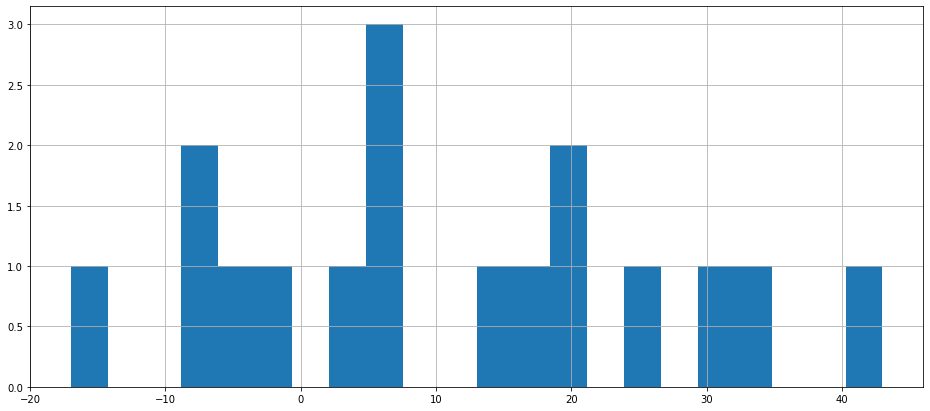

In [35]:
dfNewEngland["point differential"].hist(bins=22,figsize=(16,7))

### Dallas quarter chart

In [36]:
dfDallas = dfCopy[(dfCopy["team"]) == "Dallas"]
dfDallas

,date,Rot,VH,team,1st,2nd,3rd,4th,final,open,close,american odds,2H,open spread,close spread,open total,close total,point differential,probability odds,decimal odds
25,2019-09-08,476,H,Dallas,7,14,14,0,35,7.0,7.0,-340,1.0,-7.0,-7.0,46.0,44.5,18.0,77.27,1.29
42,2019-09-15,271,V,Dallas,0,14,7,10,31,4.5,6.0,-265,3.0,-4.5,-6.0,44.0,46.5,10.0,72.6,1.38
79,2019-09-22,476,H,Dallas,10,0,14,7,31,17.0,22.5,-5000,9.5,-17.0,-22.5,47.0,46.5,25.0,98.04,1.02
120,2019-09-29,275,V,Dallas,3,0,7,0,10,3.0,2.5,-150,3.0,-3.0,-2.5,45.0,47.0,-2.0,60.0,1.67
149,2019-10-06,474,H,Dallas,0,0,10,14,24,4.0,3.0,-185,7.0,-4.0,-3.0,48.0,46.5,-10.0,64.91,1.54
172,2019-10-13,269,V,Dallas,0,6,3,13,22,9.5,7.0,-340,7.5,-9.5,-7.0,44.0,43.5,-2.0,77.27,1.29
203,2019-10-20,474,H,Dallas,14,13,0,10,37,3.0,3.0,-160,24.0,-3.0,-3.0,47.5,50.0,27.0,61.54,1.62
262,2019-11-04,475,V,Dallas,3,10,3,21,37,7.0,6.5,-330,4.5,-7.0,-6.5,47.0,48.5,19.0,76.74,1.3
287,2019-11-10,272,H,Dallas,0,14,7,3,24,2.5,3.0,-185,3.0,-2.5,-3.0,45.5,48.0,-4.0,64.91,1.54
292,2019-11-17,451,V,Dallas,3,21,3,8,35,3.5,7.0,-400,3.0,-3.5,-7.0,51.5,46.5,8.0,80.0,1.25


In [37]:
dfDallas.index

Int64Index([25, 42, 79, 120, 149, 172, 203, 262, 287, 292, 338, 347, 376, 433,
            462, 479],
           dtype='int64')

In [38]:
dfDallas["date"] = pd.to_datetime(dfDallas["date"])

<ipython-input-38-503b05aacedf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDallas["date"] = pd.to_datetime(dfDallas["date"])


In [39]:
dfDallas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 25 to 479
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                16 non-null     datetime64[ns]
 1   Rot                 16 non-null     int64         
 2   VH                  16 non-null     object        
 3   team                16 non-null     object        
 4   1st                 16 non-null     int64         
 5   2nd                 16 non-null     int64         
 6   3rd                 16 non-null     int64         
 7   4th                 16 non-null     int64         
 8   final               16 non-null     int64         
 9   open                16 non-null     float64       
 10  close               16 non-null     float64       
 11  american odds       16 non-null     int64         
 12  2H                  16 non-null     float64       
 13  open spread         16 non-null     object        

In [40]:
# dallasDf.set_index('Date',inplace=True)
# dallasDf.index

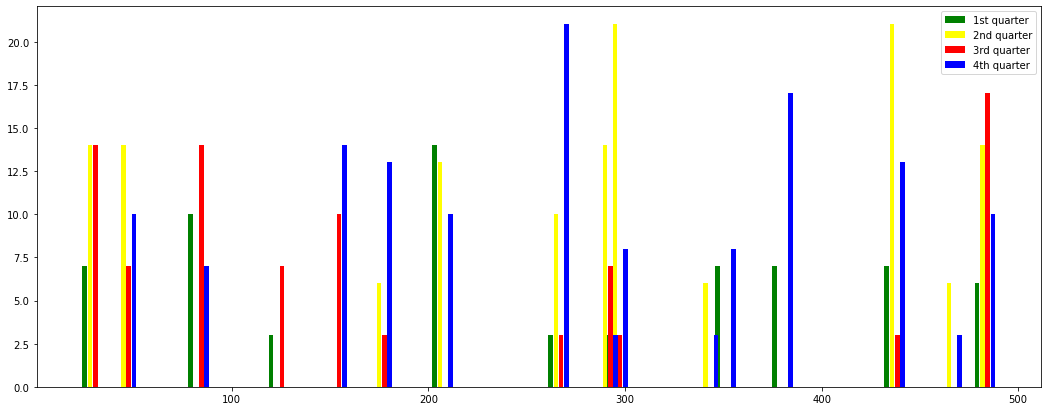

In [41]:
plt.figure(figsize=(18,7))
plt.bar(dfDallas.index,dfDallas["1st"],width=2.3,color="green",label="1st quarter")
plt.bar(dfDallas.index + 2.8,dfDallas["2nd"],width=2.3,color="yellow",label="2nd quarter")
plt.bar(dfDallas.index + 5.5,dfDallas["3rd"],width=2.3,color="red",label="3rd quarter")
plt.bar(dfDallas.index + 8.2,dfDallas["4th"],width=2.3,color="blue",label="4th quarter")
plt.legend()
# plt.bar(len(dallasDf),dallasDf["2nd"],width=0.9)

### Close spread Seattle

In [42]:
dfSeattle = dfCopy[(dfCopy["team"] == "Seattle")]
dfSeattle

,date,Rot,VH,team,1st,2nd,3rd,4th,final,open,close,american odds,2H,open spread,close spread,open total,close total,point differential,probability odds,decimal odds
21,2019-09-08,472,H,Seattle,0,14,0,7,21,7.5,9.0,-500,6.5,-7.5,-9.0,43.5,44.5,1.0,83.33,1.2
46,2019-09-15,275,V,Seattle,0,7,14,7,28,46.5,47.0,180,22.5,3.5,4.0,46.5,47.0,2.0,35.71,2.8
85,2019-09-22,482,H,Seattle,7,0,0,20,27,1.0,5.0,-250,3.0,-1.0,-5.0,50.0,44.0,-6.0,71.43,1.4
114,2019-09-29,269,V,Seattle,10,10,0,7,27,3.5,5.5,-260,0.5,-3.5,-5.5,46.0,49.0,17.0,72.22,1.38
125,2019-10-03,302,H,Seattle,7,7,7,9,30,2.0,1.5,-130,0.0,-2.0,-1.5,48.0,48.0,1.0,56.52,1.77
158,2019-10-13,255,V,Seattle,6,12,7,7,32,46.0,45.5,100,0.5,2.5,1.0,46.0,45.5,4.0,50.0,2.0
199,2019-10-20,470,H,Seattle,0,13,0,3,16,3.5,3.0,-150,2.5,-3.5,-3.0,50.5,48.0,-14.0,60.0,1.67
214,2019-10-27,257,V,Seattle,3,21,0,3,27,3.0,7.5,-400,1.5,-3.0,-7.5,54.0,49.0,7.0,80.0,1.25
255,2019-11-03,468,H,Seattle,7,6,8,13,40,5.5,4.0,-220,6.5,-5.5,-4.0,53.5,51.0,6.0,68.75,1.45
288,2019-11-11,273,V,Seattle,0,7,14,3,27,44.0,47.0,215,23.0,6.5,6.5,44.0,47.0,3.0,31.75,3.15


### Switch open/close spread and total

In [43]:
temp = dfSeattle["open spread"].loc[506]
dfSeattle.at[506,"open spread"] = dfSeattle["open total"].loc[506]
dfSeattle.at[506,"open total"] = temp * -1

temp = dfSeattle["close spread"].loc[506]
dfSeattle.at[506,"close spread"] = dfSeattle["close total"].loc[506]
dfSeattle.at[506,"close total"] = temp * -1

dfSeattle

,date,Rot,VH,team,1st,2nd,3rd,4th,final,open,close,american odds,2H,open spread,close spread,open total,close total,point differential,probability odds,decimal odds
21,2019-09-08,472,H,Seattle,0,14,0,7,21,7.5,9.0,-500,6.5,-7.5,-9.0,43.5,44.5,1.0,83.33,1.2
46,2019-09-15,275,V,Seattle,0,7,14,7,28,46.5,47.0,180,22.5,3.5,4.0,46.5,47.0,2.0,35.71,2.8
85,2019-09-22,482,H,Seattle,7,0,0,20,27,1.0,5.0,-250,3.0,-1.0,-5.0,50.0,44.0,-6.0,71.43,1.4
114,2019-09-29,269,V,Seattle,10,10,0,7,27,3.5,5.5,-260,0.5,-3.5,-5.5,46.0,49.0,17.0,72.22,1.38
125,2019-10-03,302,H,Seattle,7,7,7,9,30,2.0,1.5,-130,0.0,-2.0,-1.5,48.0,48.0,1.0,56.52,1.77
158,2019-10-13,255,V,Seattle,6,12,7,7,32,46.0,45.5,100,0.5,2.5,1.0,46.0,45.5,4.0,50.0,2.0
199,2019-10-20,470,H,Seattle,0,13,0,3,16,3.5,3.0,-150,2.5,-3.5,-3.0,50.5,48.0,-14.0,60.0,1.67
214,2019-10-27,257,V,Seattle,3,21,0,3,27,3.0,7.5,-400,1.5,-3.0,-7.5,54.0,49.0,7.0,80.0,1.25
255,2019-11-03,468,H,Seattle,7,6,8,13,40,5.5,4.0,-220,6.5,-5.5,-4.0,53.5,51.0,6.0,68.75,1.45
288,2019-11-11,273,V,Seattle,0,7,14,3,27,44.0,47.0,215,23.0,6.5,6.5,44.0,47.0,3.0,31.75,3.15


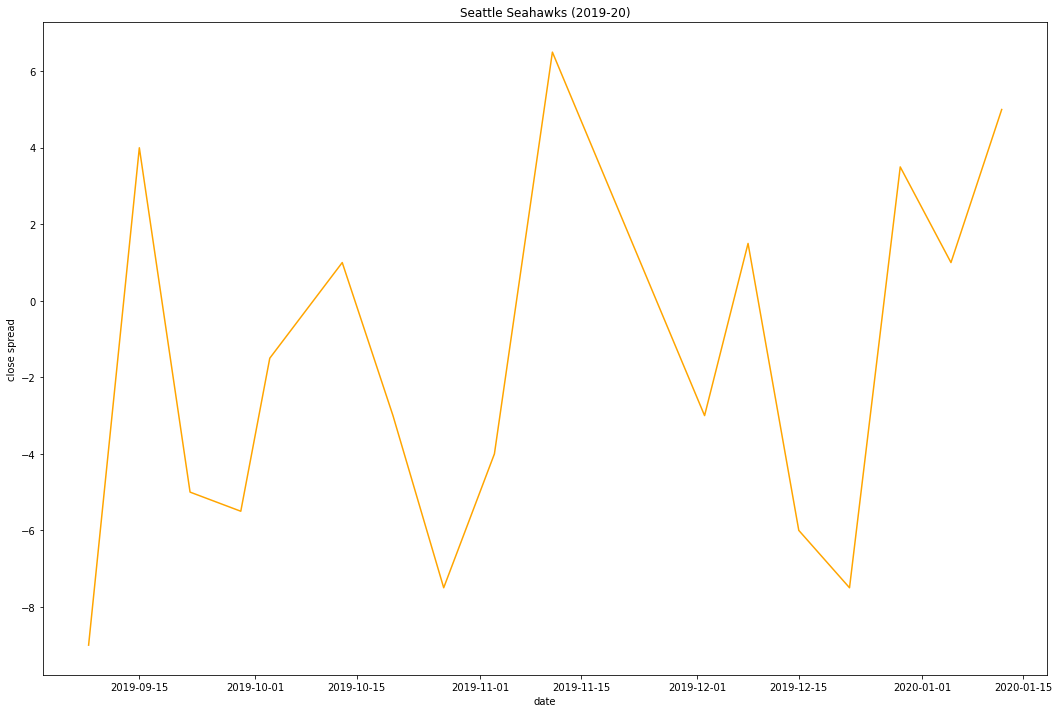

In [48]:
plt.figure(figsize=(18,12))
plt.xlabel("date")
plt.ylabel("close spread")
plt.title("Seattle Seahawks (2019-20)")
plt.plot(dfSeattle.date,dfSeattle["close spread"],color="orange")
plt.show()